##INTRODUCTION
The aviation industry experiences the least number of accidents and can easily qualify as the safest means of transport. However when accidents occur they are fatal. The analysis here-in explores the type of aircraft vis a vis the number of accidents. Other factors in consideration are weather and the state. This is to inform business on which fleet to acquire for the expansion of its operations. The below analysis is designed for the aviation industry.

#Objectives

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1',low_memory=False )
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the first five columns we can identify missing values indicated by NaN in the columns from a glance

In [4]:
df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  

In total there are 88889 rows and 31 columns

#Missing Values

In [5]:
#Checking for missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

According to the data on missing values; Event.Id, Investigation.Type, Accident.Number, Event.Date are the columns with no missing values while Schedule, Air.carrier, FAR Description, Latitiude. Longitude, Aircraft Category are missing plenty of data, they are almost empty.

In [6]:
#dropping columns with a lot of missing values
df = df.drop(columns=['Air.carrier', 'Schedule', 'FAR.Description'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The weather column is important for our analysis. It is a string therefore replacing the missing values will be similarly with a string.

In [8]:
df= df.dropna(subset= ['Latitude', 'Longitude'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Reciprocating,Unknown,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,30-04-2008
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,Reciprocating,Personal,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,28-03-2006
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,NaN,NaN,...,Reciprocating,Personal,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,23-07-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


In [9]:
#Fill in the missing values in weather condition with a placeholder
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')

#Duplicates

In [10]:
#Checking for duplicates
df.duplicated().value_counts()

False    34367
dtype: int64

There are no duplicates in our dataset.

#Explore data distribution. 
We will look at the aircraft model, weather conditions, state, injuries

In [11]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Reciprocating,Unknown,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,30-04-2008
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,Reciprocating,Personal,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,28-03-2006
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,NaN,NaN,...,Reciprocating,Personal,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,23-07-2003


In [12]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,32139.000000,25123.000000,24242.000000,24762.000000,29654.000000
mean,1.122032,0.594197,0.375134,0.318755,4.921562
std,0.404921,2.987687,1.752950,1.061173,26.185905
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,2.000000
max,8.000000,228.000000,137.000000,84.000000,699.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34367 entries, 2 to 88886
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                34367 non-null  object 
 1   Investigation.Type      34367 non-null  object 
 2   Accident.Number         34367 non-null  object 
 3   Event.Date              34367 non-null  object 
 4   Location                34362 non-null  object 
 5   Country                 34366 non-null  object 
 6   Latitude                34367 non-null  object 
 7   Longitude               34367 non-null  object 
 8   Airport.Code            22410 non-null  object 
 9   Airport.Name            22634 non-null  object 
 10  Injury.Severity         34134 non-null  object 
 11  Aircraft.damage         33423 non-null  object 
 12  Aircraft.Category       25953 non-null  object 
 13  Registration.Number     33983 non-null  object 
 14  Make                    34345 non-null

Most of the data needed to make a comparison is in strings form, in text. 

#Data Exploration
In this next section we are going to group the data by year and the injuries. We will further look at the model most frquently used that year.
Additionally, we will gain more insight on the prevailing weather conditions and what the report captured at the time. To do so we extract the date from the Event.Date column and extract the year.

In [17]:
#Access the date column essential for our analysis
df['Event.Date'].unique()

array(['1974-08-30', '1979-09-17', '1982-03-16', ..., '2022-12-15',
       '2022-12-16', '2022-12-26'], dtype=object)

In [18]:
#Creating a column with dates
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [19]:
#Getting the year only from the date for use in the analysis
df['Year'] = df['Event.Date'].map(lambda x: str(x)[:4])
df['Year'].head()

2       1974
5       1979
593     1982
3654    1983
6202    1983
Name: Year, dtype: object

In [20]:
#Find out the total injuries per year
injuries_by_year = df.groupby('Year')['Total.Fatal.Injuries'].sum()
injuries_by_year.head()

Year
1974    3.0
1979    0.0
1982    1.0
1983    4.0
1988    0.0
Name: Total.Fatal.Injuries, dtype: float64

In [21]:
most_fatal_injuries_year = injuries_by_year.idxmax()
most_fatal_injuries_value = injuries_by_year.max()

print(f"The year with the most fatal injuries is {most_fatal_injuries_year} with {most_fatal_injuries_value} fatal injuries.")


The year with the most fatal injuries is 2003 with 1074.0 fatal injuries.


According to our data, 2003 had the most fatal injuries with 1074 fatal injuries

In [27]:
#Lets zoom in to that year and get the dataframe
most_fatal_year = injuries_by_year.idxmax()
most_fatal_year

'2003'

In [44]:
df_most_fatal_year = df[df['Year'] == most_fatal_year]
df_most_fatal_year

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
53978,20030110X00044,Accident,MIA03LA035,2003-01-01,"PEACHTREE CITY, GA",United States,33.351111,-84.563889,KFFC,Peachtree City Airport,...,Personal,NaN,NaN,1.0,NaN,VMC,Cruise,Probable Cause,30-06-2004,2003
53979,20030108X00035,Accident,FTW03LA069,2003-01-01,"STEPHENVILLE, TX",United States,32.215278,-98.1775,SEP,Clark Field,...,Personal,NaN,1.0,1.0,NaN,VMC,Takeoff,Probable Cause,30-06-2004,2003
53980,20030107X00031,Accident,LAX03FA057,2003-01-01,"TUCSON, AZ",United States,32.141389,-11.169445,RYN,RYAN,...,Personal,1.0,3.0,NaN,NaN,VMC,Takeoff,Probable Cause,28-06-2006,2003
53981,20030102X00002,Accident,DEN03LA027,2003-01-01,"Milford, UT",United States,38.283333,-112.9,NaN,NaN,...,Instructional,NaN,2.0,NaN,NaN,VMC,Cruise,Probable Cause,26-08-2003,2003
53982,20030110X00053,Accident,CHI03LA048,2003-01-01,"Lansing, IL",United States,41.539722,-87.531945,IGQ,Lansing Municipal Airport,...,Personal,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,30-03-2004,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56058,20040211X00181,Accident,SEA04CA037,2003-12-30,"BEND, OR",United States,44.094722,-121.200556,S07,BEND MUNI,...,Personal,NaN,NaN,NaN,2.0,VMC,Landing,Probable Cause,01-09-2004,2003
56059,20040130X00133,Accident,MIA04WA046,2003-12-30,"LAMENTIN, MARTINIQUE",Martinique,14.583333,-61,NaN,NaN,...,Personal,NaN,NaN,NaN,1.0,VMC,NaN,Foreign,30-01-2004,2003
56060,20040102X00001,Accident,CHI04LA050,2003-12-30,"WEST CHICAGO, IL",United States,42.114167,-87.901389,DPA,DUPAGE,...,Instructional,NaN,NaN,NaN,2.0,VMC,Standing,Probable Cause,29-07-2004,2003
56061,20040112X00051,Accident,ANC04LA017,2003-12-30,"TOGIAK, AK",United States,59.054722,-60.383333,NaN,NaN,...,Personal,NaN,NaN,2.0,NaN,VMC,Cruise,Probable Cause,01-09-2004,2003


In the most fatal year, the broad phase of flight varied from cruise to take off to landing, standing, maneuvering. At this point we cannot attribute the accidents to the broad phase of the flight.

In [45]:
#To get at a glance, the highest number in that year
df_sorted_fatalities = df_most_fatal_year.sort_values(by='Total.Fatal.Injuries', ascending=False)
df_sorted_fatalities.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
56036,20040128X00121,Accident,WAS04RA010,2003-12-25,"Cotonou, Benin",Benin,6.353889,2.385,NaN,NaN,...,NaN,141.0,25.0,NaN,NaN,VMC,NaN,Foreign,NaN,2003
55050,20040819X01260,Accident,WAS03RA019,2003-07-08,"Port Sudan, Sudan",Sudan,19.5,-37.333333,NaN,NaN,...,NaN,115.0,1.0,NaN,NaN,IMC,NaN,Foreign,19-08-2004,2003
54021,20030114X00063,Accident,FTW03RA083,2003-01-09,"Chachapoyas, Peru",Peru,-6.025556,-78.044444,NaN,NaN,...,NaN,46.0,NaN,NaN,NaN,IMC,NaN,Foreign,14-01-2003,2003
55508,20030930X01617,Accident,FTW03WA226,2003-09-13,"Tecalitran, Mexico",Mexico,19.3375,-103.756944,NaN,NaN,...,Personal,8.0,NaN,NaN,NaN,IMC,NaN,Foreign,NaN,2003
55549,20031001X01630,Accident,LAX03MA292,2003-09-20,"GrandCanyonWest, AZ",United States,35.985,-113.793333,1G4,Grand Canyon West,...,NaN,7.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,14-11-2007,2003


The accident with the most fatalities took place in Cotonou, Benin. Investigation ruled it out as an accident. The weather conditions were VMC (Visual Meteorological Conditions). For the next three we have Sudan, Peru and Mexico showing IMC (Instrument Meteorological Condition) where the weather is foggy, cloudy and visibility is low. Weather does not appear to be a great factor in influencing the number of accidents that occur.

In [30]:
make_and_model_in_use = df_most_fatal_year.groupby(['Make', 'Model']).size().reset_index(name='Counts')
make_and_model_in_use

,Make,Model,Counts
0,Adams Balloon,A55,1
1,Aero Commander,100,3
2,Aero Commander,200D,1
3,Aero Commander,500-B,1
4,Aero Commander,500B,1
...,...,...,...
1037,Young,Cozy MkIV,1
1038,Young,Pietenpol Air Camper,1
1039,Zenith,601HDS,1
1040,Zimmerman,Glastar,1


The data gives us 1042 rows and 3 columns of the makes and models on the year with the highest number of fatal accidents.

In [38]:
#The model with the most reccuring count
make_and_model_in_use_sorted = make_model_in_use.sort_values(by='Counts', ascending=False)
make_and_model_in_use_sorted

,Make,Model,Counts
339,Cessna,172N,29
343,Cessna,172S,29
322,Cessna,152,29
340,Cessna,172P,26
338,Cessna,172M,22
...,...,...,...
432,Cessna,501,1
433,Cessna,525,1
434,Cessna,550,1
435,Cessna,551,1


According to our data, leading is Cessna make 172N contributing 29 out of the 1074 total fatalities. Cessna make stands out as it appears most, however the model varies.

In [42]:
#Least number of accidents
least_fatal_year = injuries_by_year.idxmin()
least_fatal_year

'1979'

According to our data, the year with the least fatal injuries is 1979

In [43]:
#Get the data from the year with the least accidents
df_least_fatal_year = df[df['Year'] == least_fatal_year]
df_least_fatal_year


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979


In 1979,while the investigation ruled it as an accident, the report status indicates probable cause. It happened in Boston, Massachusetts. The weather condition recorded is VMC meaning clear skies. Weather condition does not seem to be a contributing factor. The broad.phase.of.flight reads climb.

In [49]:
#Examine the broad phase of flight
df['Broad.phase.of.flight'].value_counts().idxmax()

'Landing'

The most frequent Broad phase of flight is landing.

##Data Visualization
Data visualization is an integral part of analysis. This helps us to process data easily and good visuals may catch something that could easily be lost in details.

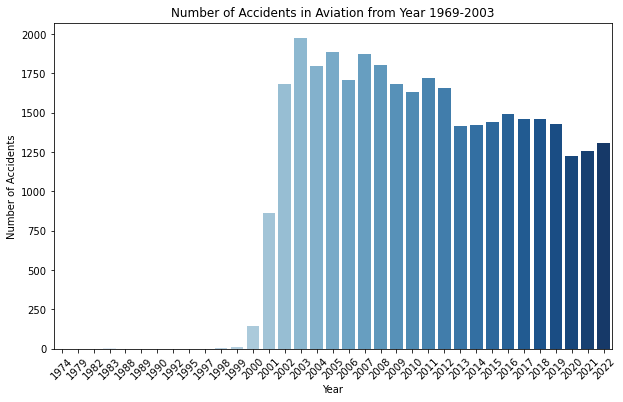

In [51]:
#create a bar plot to visualize the number of accidents vis a vis the year
import seaborn as sns

# Group by year and count the number of accidents
accidents_by_year = df.groupby('Year').size().reset_index(name='Number of Accidents')

# Plot the data using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Number of Accidents', data=accidents_by_year, palette='Blues')
plt.title('Number of Accidents in Aviation from Year 1969-2003')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


The bar graph shows the number of aircraft accidents. 2003 is the year with the most accidents and while the least is not very clear, it is plain sight that the number if any of aircraft accidents between 1974-1998 are 